In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('title.basics.tsv', sep='\t', low_memory=False)

In [3]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
df['titleType'].unique()

array(['short', 'movie', 'tvSeries', 'tvShort', 'tvMovie', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [5]:
movies = df[df['titleType'] == 'movie']

In [6]:
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama


In [7]:
movies = movies.drop(labels=['isAdult', 'endYear', 'originalTitle', 'titleType'], axis=1)

In [8]:
movies = movies[movies['startYear'] != '\\N']
movies['startYear'] = pd.to_numeric(movies['startYear'])

In [9]:
movies = movies[movies['runtimeMinutes'] != '\\N']
movies['runtimeMinutes'] = pd.to_numeric(movies['runtimeMinutes'])

In [10]:
movies = movies[movies['genres'] != '\\N']

In [11]:
ratings = pd.read_csv('movie.ratings.tsv', sep='\t')

In [12]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1949
1,tt0000002,5.8,264
2,tt0000003,6.5,1782
3,tt0000004,5.6,179
4,tt0000005,6.2,2583


In [13]:
movies = movies.merge(ratings, on='tconst')

In [14]:
movies

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,Romance,5.3,204
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",5.2,466
2,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,808
3,tt0000591,The Prodigal Son,1907,90,Drama,4.4,20
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.2,67
...,...,...,...,...,...,...,...
253354,tt9916170,The Rehearsal,2019,51,Drama,7.0,7
253355,tt9916190,Safeguard,2020,95,"Action,Adventure,Thriller",3.7,241
253356,tt9916270,Il talento del calabrone,2020,84,Thriller,5.8,1393
253357,tt9916362,Coven,2020,92,"Drama,History",6.4,5177


In [15]:
movies['genres'] = movies['genres'].apply(lambda x: x.split(',')).values
movies

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,[Romance],5.3,204
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"[Documentary, News, Sport]",5.2,466
2,tt0000574,The Story of the Kelly Gang,1906,70,"[Action, Adventure, Biography]",6.0,808
3,tt0000591,The Prodigal Son,1907,90,[Drama],4.4,20
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"[Adventure, Fantasy]",5.2,67
...,...,...,...,...,...,...,...
253354,tt9916170,The Rehearsal,2019,51,[Drama],7.0,7
253355,tt9916190,Safeguard,2020,95,"[Action, Adventure, Thriller]",3.7,241
253356,tt9916270,Il talento del calabrone,2020,84,[Thriller],5.8,1393
253357,tt9916362,Coven,2020,92,"[Drama, History]",6.4,5177


In [16]:
movies.drop('tconst', axis=1).to_csv('imdb_mov.csv', index=False)

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer
genre_bin = MultiLabelBinarizer()
encoded_genres = genre_bin.fit_transform(movies['genres'].values)
encoded_genres[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0]])

In [18]:
genres = [f'genre_{x.lower()}' for x in genre_bin.classes_]
genres

['genre_action',
 'genre_adult',
 'genre_adventure',
 'genre_animation',
 'genre_biography',
 'genre_comedy',
 'genre_crime',
 'genre_documentary',
 'genre_drama',
 'genre_family',
 'genre_fantasy',
 'genre_film-noir',
 'genre_game-show',
 'genre_history',
 'genre_horror',
 'genre_music',
 'genre_musical',
 'genre_mystery',
 'genre_news',
 'genre_reality-tv',
 'genre_romance',
 'genre_sci-fi',
 'genre_short',
 'genre_sport',
 'genre_talk-show',
 'genre_thriller',
 'genre_war',
 'genre_western']

In [19]:
movies

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,[Romance],5.3,204
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"[Documentary, News, Sport]",5.2,466
2,tt0000574,The Story of the Kelly Gang,1906,70,"[Action, Adventure, Biography]",6.0,808
3,tt0000591,The Prodigal Son,1907,90,[Drama],4.4,20
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"[Adventure, Fantasy]",5.2,67
...,...,...,...,...,...,...,...
253354,tt9916170,The Rehearsal,2019,51,[Drama],7.0,7
253355,tt9916190,Safeguard,2020,95,"[Action, Adventure, Thriller]",3.7,241
253356,tt9916270,Il talento del calabrone,2020,84,[Thriller],5.8,1393
253357,tt9916362,Coven,2020,92,"[Drama, History]",6.4,5177


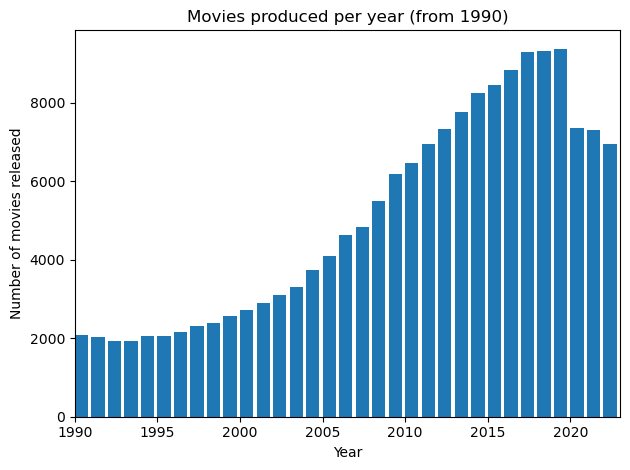

In [20]:
plt.bar(np.unique(movies['startYear']), 
        [len(movies[movies['startYear'] == year]) \
        for year in np.unique(movies['startYear'])],
        align='edge')
plt.xlim([1990, 2023])
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.title('Movies produced per year (from 1990)')
plt.tight_layout()
plt.savefig('Movies_produced_per_year')
plt.show()

In [21]:
np.unique(movies['startYear'])

array([1894, 1896, 1897, 1899, 1900, 1903, 1904, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023], dtype=int64)

In [22]:
movies.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,[Romance],5.3,204
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"[Documentary, News, Sport]",5.2,466
2,tt0000574,The Story of the Kelly Gang,1906,70,"[Action, Adventure, Biography]",6.0,808
3,tt0000591,The Prodigal Son,1907,90,[Drama],4.4,20
4,tt0000679,The Fairylogue and Radio-Plays,1908,120,"[Adventure, Fantasy]",5.2,67


In [23]:
#movies[genres] = encoded_genres
#movies_hot = movies.drop('genres', axis=1)

In [24]:
#movies_hot.head()

In [25]:
# "the movie dataset" -2018
tmd = pd.read_csv('movies_metadata.csv')

C:\Users\micha\AppData\Local\Temp\ipykernel_16288\1460554461.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmd = pd.read_csv('movies_metadata.csv')


In [26]:
tmd.shape

(45466, 24)

In [27]:
tmd.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [28]:
tmd.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [29]:
def year(date_str):
    try:
        return int(date_str.split('-')[0])
    except:
        return None
tmd['release_date'].apply(year)

0        1995.0
1        1995.0
2        1995.0
3        1995.0
4        1995.0
          ...  
45461       NaN
45462    2011.0
45463    2003.0
45464    1917.0
45465    2017.0
Name: release_date, Length: 45466, dtype: float64

In [30]:
tmd.iloc[45461]

adult                                                                False
belongs_to_collection                                                  NaN
budget                                                                   0
genres                   [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
homepage                              http://www.imdb.com/title/tt6209470/
id                                                                  439050
imdb_id                                                          tt6209470
original_language                                                       fa
original_title                                                     رگ خواب
overview                       Rising and falling between a man and woman.
popularity                                                        0.072051
poster_path                               /jldsYflnId4tTWPx8es3uzsB1I8.jpg
production_companies                                                    []
production_countries     

In [31]:
tmd['year'] = tmd['release_date'].apply(year)

In [32]:
tmd['year'].describe()

count    45379.000000
mean      1991.750281
std         28.945618
min          1.000000
25%       1978.000000
50%       2001.000000
75%       2010.000000
max       2020.000000
Name: year, dtype: float64

In [33]:
tmd[tmd['status'] == 'Released']['year'].describe()

count    44936.000000
mean      1991.819677
std         24.072588
min       1874.000000
25%       1978.000000
50%       2001.000000
75%       2010.000000
max       2017.000000
Name: year, dtype: float64

In [34]:
tmd = tmd[(tmd['status'] == 'Released') == (tmd['video'] == False)]
tmd = tmd.drop(['homepage', 'id', 'imdb_id', 'status', 'release_date', 'original_title', 
                'poster_path', 'overview', 'video', 'tagline', 'belongs_to_collection'], axis=1)

In [35]:
tmd.columns

Index(['adult', 'budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'spoken_languages', 'title', 'vote_average', 'vote_count', 'year'],
      dtype='object')

In [36]:
tmd['popularity']

0        21.946943
1        17.015539
2          11.7129
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 44927, dtype: object

In [37]:
tmd.loc[20000]

adult                                                               False
budget                                                             500000
genres                  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
original_language                                                      he
popularity                                                       1.162001
production_companies    [{'name': 'Lama Films', 'id': 15}, {'name': 'U...
production_countries             [{'iso_3166_1': 'IL', 'name': 'Israel'}]
revenue                                                          116207.0
runtime                                                              84.0
spoken_languages                [{'iso_639_1': 'he', 'name': 'עִבְרִית'}]
title                                                               Yossi
vote_average                                                          6.8
vote_count                                                           22.0
year                                  

In [38]:
tmd.head()

,adult,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,1995.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,1995.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men,6.5,92.0,1995.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,1995.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,1995.0


In [39]:
def to_int(x):
    try: 
        return int(x)
    except:
        return None
tmd['budget'] = tmd['budget'].apply(to_int)
tmd['revenue'] = tmd['revenue'].apply(to_int)
tmd['budget'] = tmd['budget'].apply(to_int)

In [40]:
tmd = tmd[tmd['budget'] > 0]
tmd = tmd[tmd['revenue'] > 0]
tmd = tmd[tmd['runtime'] > 0]
tmd = tmd[tmd['original_language'] != 'xx']

In [41]:
tmd = tmd.drop('adult', axis=1)

In [42]:
tmd.columns

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'revenue', 'runtime',
       'spoken_languages', 'title', 'vote_average', 'vote_count', 'year'],
      dtype='object')

In [43]:
print('Types in column')
for column in tmd.columns:
    print(f'{column}: {tmd[column].apply(type).unique()}')

Types in column
budget: [<class 'float'>]
genres: [<class 'str'>]
original_language: [<class 'str'>]
popularity: [<class 'float'> <class 'str'>]
production_companies: [<class 'str'>]
production_countries: [<class 'str'>]
revenue: [<class 'float'>]
runtime: [<class 'float'>]
spoken_languages: [<class 'str'>]
title: [<class 'str'>]
vote_average: [<class 'float'>]
vote_count: [<class 'float'>]
year: [<class 'float'>]


In [44]:
tmd.head()

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,1995.0
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,1995.0
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,1995.0
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,1995.0
8,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.23158,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Sudden Death,5.5,174.0,1995.0


In [45]:
def names(x):
    try:
        x = eval(x)
        return [x['name'] for x in x]
    except:
        return None
tmd['genres'] = tmd['genres'].apply(names)

In [46]:
tmd['genres']

0               [Animation, Comedy, Family]
1              [Adventure, Fantasy, Family]
3                  [Comedy, Drama, Romance]
5          [Action, Crime, Drama, Thriller]
8             [Action, Adventure, Thriller]
                        ...                
45167    [Action, Crime, Mystery, Thriller]
45250               [Action, Comedy, Drama]
45409                       [Comedy, Drama]
45412                      [Romance, Drama]
45422      [Action, Comedy, Crime, Foreign]
Name: genres, Length: 5363, dtype: object

In [47]:
tmd = tmd.drop('spoken_languages', axis=1)


In [48]:
tmd['production_companies'] = tmd['production_companies'].apply(names)
tmd['production_countries'] = tmd['production_countries'].apply(names)

In [49]:
tmd = tmd.reset_index(drop=True)

In [50]:
tmd

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,title,vote_average,vote_count,year
0,30000000.0,"[Animation, Comedy, Family]",en,21.946943,[Pixar Animation Studios],[United States of America],373554033.0,81.0,Toy Story,7.7,5415.0,1995.0
1,65000000.0,"[Adventure, Fantasy, Family]",en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,104.0,Jumanji,6.9,2413.0,1995.0
2,16000000.0,"[Comedy, Drama, Romance]",en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0
3,60000000.0,"[Action, Crime, Drama, Thriller]",en,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],187436818.0,170.0,Heat,7.7,1886.0,1995.0
4,35000000.0,"[Action, Adventure, Thriller]",en,5.23158,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],64350171.0,106.0,Sudden Death,5.5,174.0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5358,11000000.0,"[Action, Crime, Mystery, Thriller]",en,40.796775,"[Thunder Road Pictures, Star Thrower Entertain...","[United Kingdom, United States of America, Can...",184770205.0,111.0,Wind River,7.4,181.0,2017.0
5359,12000000.0,"[Action, Comedy, Drama]",ta,1.323587,[AVM Productions],[India],19000000.0,185.0,Sivaji: The Boss,6.9,25.0,2007.0
5360,800000.0,"[Comedy, Drama]",en,0.903061,[],[],1328612.0,100.0,Savages,5.8,6.0,2006.0
5361,2000000.0,"[Romance, Drama]",en,0.121844,[Profit],[Russia],1268793.0,107.0,Pro Lyuboff,4.0,3.0,2010.0


In [51]:
genre_bin = MultiLabelBinarizer()
genre_hot = genre_bin.fit_transform(tmd['genres'])
tmd_90 = tmd[tmd['year'] >= 1990]
tmd['genres'] = pd.Series(list(genre_hot))

In [52]:
tmd.loc[0]['genres']

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
genre_bin.inverse_transform(np.expand_dims(tmd.loc[0]['genres'], axis=0))

[('Animation', 'Comedy', 'Family')]

In [54]:
genre_bin.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

In [55]:
tmd['profit'] = tmd['revenue'] - tmd['budget']
tmd

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,title,vote_average,vote_count,year,profit
0,30000000.0,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",en,21.946943,[Pixar Animation Studios],[United States of America],373554033.0,81.0,Toy Story,7.7,5415.0,1995.0,343554033.0
1,65000000.0,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,104.0,Jumanji,6.9,2413.0,1995.0,197797249.0
2,16000000.0,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...",en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0,65452156.0
3,60000000.0,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],187436818.0,170.0,Heat,7.7,1886.0,1995.0,127436818.0
4,35000000.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,5.23158,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],64350171.0,106.0,Sudden Death,5.5,174.0,1995.0,29350171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,11000000.0,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",en,40.796775,"[Thunder Road Pictures, Star Thrower Entertain...","[United Kingdom, United States of America, Can...",184770205.0,111.0,Wind River,7.4,181.0,2017.0,173770205.0
5359,12000000.0,"[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",ta,1.323587,[AVM Productions],[India],19000000.0,185.0,Sivaji: The Boss,6.9,25.0,2007.0,7000000.0
5360,800000.0,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,0.903061,[],[],1328612.0,100.0,Savages,5.8,6.0,2006.0,528612.0
5361,2000000.0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...",en,0.121844,[Profit],[Russia],1268793.0,107.0,Pro Lyuboff,4.0,3.0,2010.0,-731207.0


In [56]:
from MoviesHelper import has_value
tmd_usa = tmd[has_value(tmd['production_countries'], 'United States of America')]
tmd_usa = tmd_usa.reset_index(drop=True)
tmd_usa

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,title,vote_average,vote_count,year,profit
0,30000000.0,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",en,21.946943,[Pixar Animation Studios],[United States of America],373554033.0,81.0,Toy Story,7.7,5415.0,1995.0,343554033.0
1,65000000.0,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,104.0,Jumanji,6.9,2413.0,1995.0,197797249.0
2,16000000.0,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...",en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0,65452156.0
3,60000000.0,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],187436818.0,170.0,Heat,7.7,1886.0,1995.0,127436818.0
4,35000000.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,5.23158,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],64350171.0,106.0,Sudden Death,5.5,174.0,1995.0,29350171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,8500000.0,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,1.542843,[Metro-Goldwyn-Mayer (MGM)],"[United States of America, Japan]",5730596.0,90.0,Gymkata,4.7,14.0,1985.0,-2769404.0
4378,260000000.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,39.186819,"[Paramount Pictures, Di Bonaventura Pictures, ...",[United States of America],604942143.0,149.0,Transformers: The Last Knight,6.2,1440.0,2017.0,344942143.0
4379,60000000.0,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",en,50.903593,"[Imagine Entertainment, Weed Road Pictures, Me...","[South Africa, United States of America]",71000000.0,95.0,The Dark Tower,5.7,688.0,2017.0,11000000.0
4380,50000000.0,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",en,33.694599,"[Columbia Pictures, Sony Pictures Animation]",[United States of America],66913939.0,86.0,The Emoji Movie,5.8,327.0,2017.0,16913939.0


In [57]:
company_bin = MultiLabelBinarizer()
country_bin = MultiLabelBinarizer()
#tmd['production_companies'] = pd.Series(list(
company_hot = company_bin.fit_transform(tmd['production_companies'])
#tmd['production_countries'] = pd.Series(list(
country_hot = country_bin.fit_transform(tmd['production_countries'])
company_hot, country_hot

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [58]:
np.unique(company_bin.classes_).shape

(5425,)

In [59]:
np.unique(tmd['original_language'])

array(['af', 'bm', 'ca', 'cn', 'da', 'de', 'el', 'en', 'es', 'fa', 'fi',
       'fr', 'he', 'hi', 'hu', 'id', 'is', 'it', 'ja', 'kn', 'ko', 'ml',
       'mr', 'nb', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sr', 'sv', 'ta',
       'te', 'th', 'tr', 'ur', 'vi', 'zh'], dtype=object)

In [60]:
from sklearn.preprocessing import OneHotEncoder
lang_ohe = OneHotEncoder(sparse_output=False, dtype='int16')
langs = lang_ohe.fit_transform(tmd['original_language'].values.reshape(-1, 1))

In [61]:
lang_ohe.inverse_transform([langs[0]])

array([['en']], dtype=object)

In [62]:
tmd['original_language'] = pd.Series(list(langs))

In [63]:
tmd

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,title,vote_average,vote_count,year,profit
0,30000000.0,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",21.946943,[Pixar Animation Studios],[United States of America],373554033.0,81.0,Toy Story,7.7,5415.0,1995.0,343554033.0
1,65000000.0,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,104.0,Jumanji,6.9,2413.0,1995.0,197797249.0
2,16000000.0,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0,65452156.0
3,60000000.0,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],187436818.0,170.0,Heat,7.7,1886.0,1995.0,127436818.0
4,35000000.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",5.23158,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],64350171.0,106.0,Sudden Death,5.5,174.0,1995.0,29350171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,11000000.0,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",40.796775,"[Thunder Road Pictures, Star Thrower Entertain...","[United Kingdom, United States of America, Can...",184770205.0,111.0,Wind River,7.4,181.0,2017.0,173770205.0
5359,12000000.0,"[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.323587,[AVM Productions],[India],19000000.0,185.0,Sivaji: The Boss,6.9,25.0,2007.0,7000000.0
5360,800000.0,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.903061,[],[],1328612.0,100.0,Savages,5.8,6.0,2006.0,528612.0
5361,2000000.0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.121844,[Profit],[Russia],1268793.0,107.0,Pro Lyuboff,4.0,3.0,2010.0,-731207.0


In [64]:
print('Types in column')
for column in tmd.columns:
    print(f'{column}: {tmd[column].apply(type).unique()}')

Types in column
budget: [<class 'float'>]
genres: [<class 'numpy.ndarray'>]
original_language: [<class 'numpy.ndarray'>]
popularity: [<class 'float'> <class 'str'>]
production_companies: [<class 'list'>]
production_countries: [<class 'list'>]
revenue: [<class 'float'>]
runtime: [<class 'float'>]
title: [<class 'str'>]
vote_average: [<class 'float'>]
vote_count: [<class 'float'>]
year: [<class 'float'>]
profit: [<class 'float'>]


In [65]:
#tmd_90 = tmd[tmd['year'] >= 1990]
tmd_90['popularity'] = pd.to_numeric(tmd_90['popularity'], errors='coerce')
tmd_90['profit'] = tmd_90['revenue'] - tmd_90['budget']

C:\Users\micha\AppData\Local\Temp\ipykernel_16288\163200087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmd_90['popularity'] = pd.to_numeric(tmd_90['popularity'], errors='coerce')
C:\Users\micha\AppData\Local\Temp\ipykernel_16288\163200087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmd_90['profit'] = tmd_90['revenue'] - tmd_90['budget']


In [66]:
tmd_90.select_dtypes(['number'])

,budget,popularity,revenue,runtime,vote_average,vote_count,year,profit
0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,1995.0,343554033.0
1,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,1995.0,197797249.0
2,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,1995.0,65452156.0
3,60000000.0,17.924927,187436818.0,170.0,7.7,1886.0,1995.0,127436818.0
4,35000000.0,5.231580,64350171.0,106.0,5.5,174.0,1995.0,29350171.0
...,...,...,...,...,...,...,...,...
5358,11000000.0,40.796775,184770205.0,111.0,7.4,181.0,2017.0,173770205.0
5359,12000000.0,1.323587,19000000.0,185.0,6.9,25.0,2007.0,7000000.0
5360,800000.0,0.903061,1328612.0,100.0,5.8,6.0,2006.0,528612.0
5361,2000000.0,0.121844,1268793.0,107.0,4.0,3.0,2010.0,-731207.0


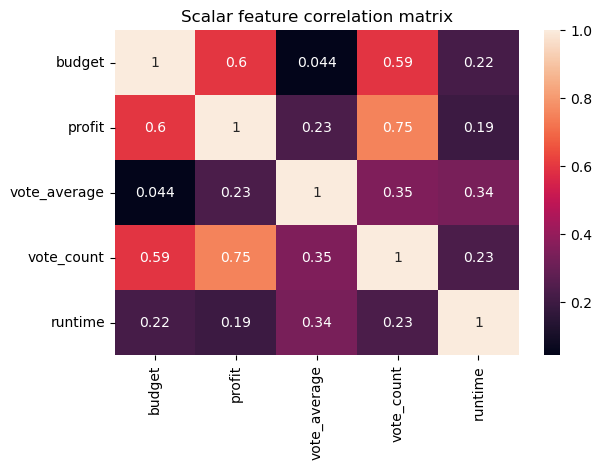

In [67]:
import seaborn as sns
sns.heatmap(tmd_90[['budget', 'profit', 'vote_average', 'vote_count', 'runtime']].corr(),
            annot=True)
            #xticklabels=['budget','revenue','runtime','average rating','rating count'],
            #yticklabels=['budget','revenue','runtime','average rating','rating count'])
plt.title('Scalar feature correlation matrix')

plt.tight_layout()

plt.savefig('corr_mat')

In [68]:
tmd_90['production_companies'].shape

(4345,)

In [69]:
def has_value(Series, string):
    bool_arr = []
    found = None
    for x in Series:
        for y in x:
            if y == string:
                bool_arr.append(True)
                found = True
        if not found: 
            bool_arr.append(False)
        found = False
    return bool_arr

#tmd_90[has_value(tmd_90['production_companies'], 'Universal Pictures')]

In [70]:
company_bin.classes_

array(['"DIA" Productions GmbH & Co. KG', '1.85 Films', '100 Bares', ...,
       'Интерфест', 'Реал-Дакота', 'Фокс'], dtype=object)

In [ ]:
revenue_by_company = [tmd_90[has_value(tmd_90['production_companies'], x)]['revenue'].sum() for x in company_bin.classes_]

In [ ]:
company_bin.classes_[np.argpartition(revenue_by_company, -5)[-5:]]

array(['Walt Disney Pictures', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Warner Bros.',
       'Universal Pictures'], dtype=object)

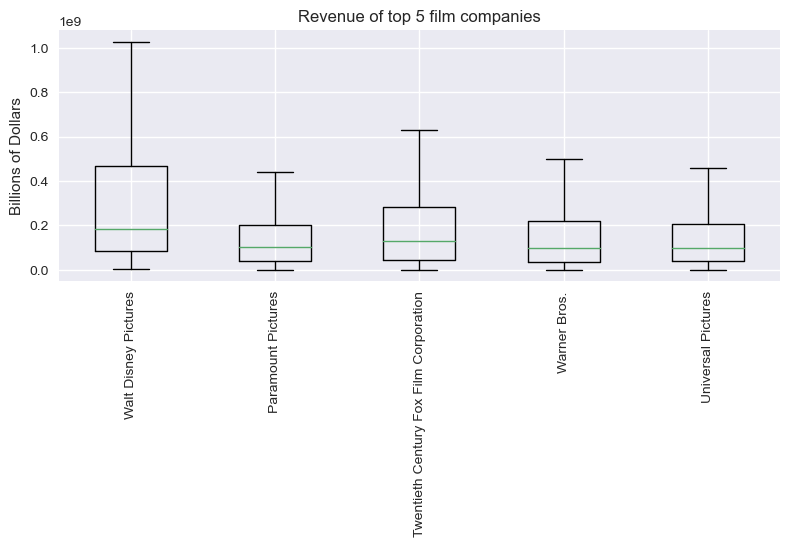

In [ ]:
plt.style.use('seaborn')
plt.boxplot([tmd_90[has_value(tmd_90['production_companies'], x)]['revenue']\
            for x in company_bin.classes_[np.argpartition(revenue_by_company, -5)[-5:]]],
            showfliers=False)
            #labels=company_bin.classes_[np.argpartition(revenue_by_company, -5)[-5:]])
plt.xticks(range(1,6), company_bin.classes_[np.argpartition(revenue_by_company, -5)[-5:]],
           rotation=90)
#plt.yticks(np.arange(0.0, 1.1, .2))# np.round(np.arange(0.0, 1.2, .2)*1000000000))
plt.ylabel('Billions of Dollars')
plt.tight_layout()
plt.title('Revenue of top 5 film companies')
plt.savefig('revenue_by_company_top_5')
plt.show()

In [ ]:
tmd_90[has_value(tmd_90['production_companies'], 'Walt Disney Pictures')]['revenue'].max()

1274219009.0

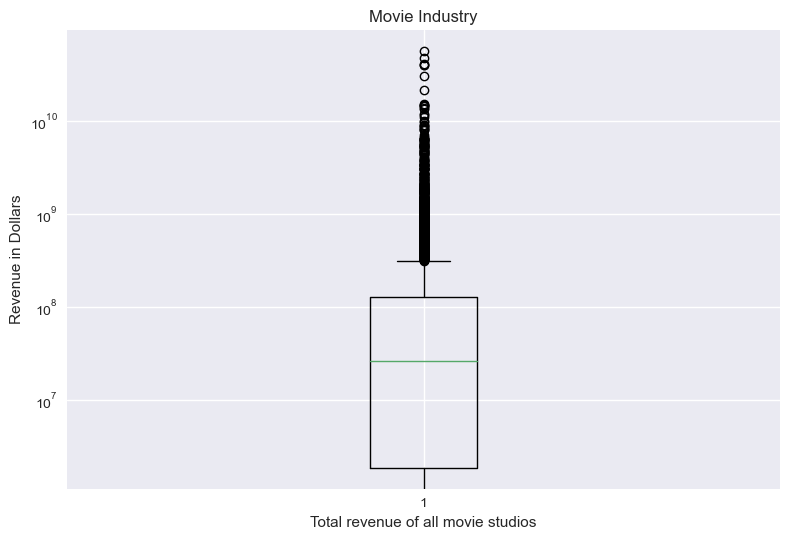

In [ ]:
plt.boxplot(revenue_by_company, showfliers=True)
plt.yscale('log')
plt.ylabel('Revenue in Dollars')
plt.title('Movie Industry')
plt.xlabel('Total revenue of all movie studios')
plt.tight_layout()
plt.savefig('movie_industry_revenue')
plt.show()

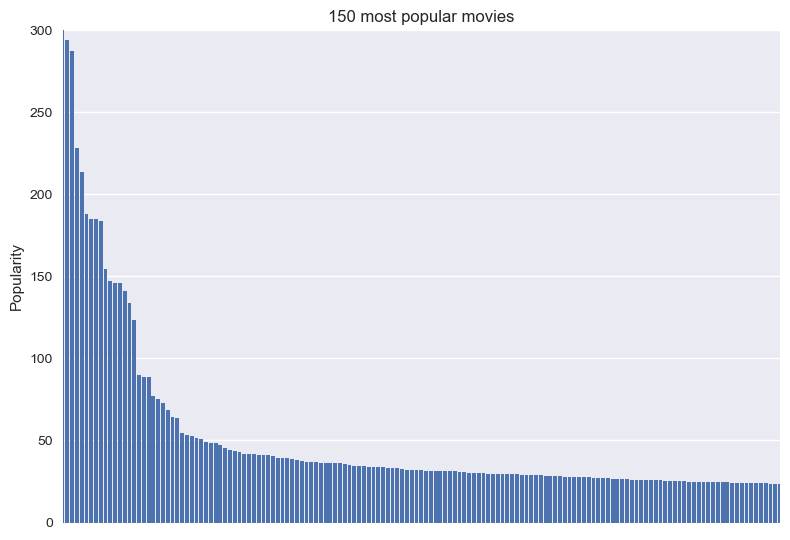

In [ ]:
plt.bar(range(len(pd.to_numeric(tmd_90['popularity']))), sorted(pd.to_numeric(tmd_90['popularity']), reverse=True))
plt.xlim([0, 150])
plt.ylim([0, 300])
plt.title('150 most popular movies')
plt.ylabel('Popularity')
plt.xticks(ticks=[])
plt.tight_layout()
#plt.savefig('150_most_popular')
plt.show()

In [ ]:
tmd_90.head()

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,title,vote_average,vote_count,year,profit
0,30000000.0,"[Animation, Comedy, Family]",en,21.946943,[Pixar Animation Studios],[United States of America],373554033.0,81.0,Toy Story,7.7,5415.0,1995.0,343554033.0
1,65000000.0,"[Adventure, Fantasy, Family]",en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,104.0,Jumanji,6.9,2413.0,1995.0,197797249.0
2,16000000.0,"[Comedy, Drama, Romance]",en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0,65452156.0
3,60000000.0,"[Action, Crime, Drama, Thriller]",en,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],187436818.0,170.0,Heat,7.7,1886.0,1995.0,127436818.0
4,35000000.0,"[Action, Adventure, Thriller]",en,5.231580,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],64350171.0,106.0,Sudden Death,5.5,174.0,1995.0,29350171.0


In [ ]:
genres_lower = [x.lower() for x in genre_bin.classes_]
genres_lower

['action',
 'adventure',
 'animation',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'foreign',
 'history',
 'horror',
 'music',
 'mystery',
 'romance',
 'science fiction',
 'tv movie',
 'thriller',
 'war',
 'western']

C:\ProgramData\miniconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\miniconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\ProgramData\miniconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


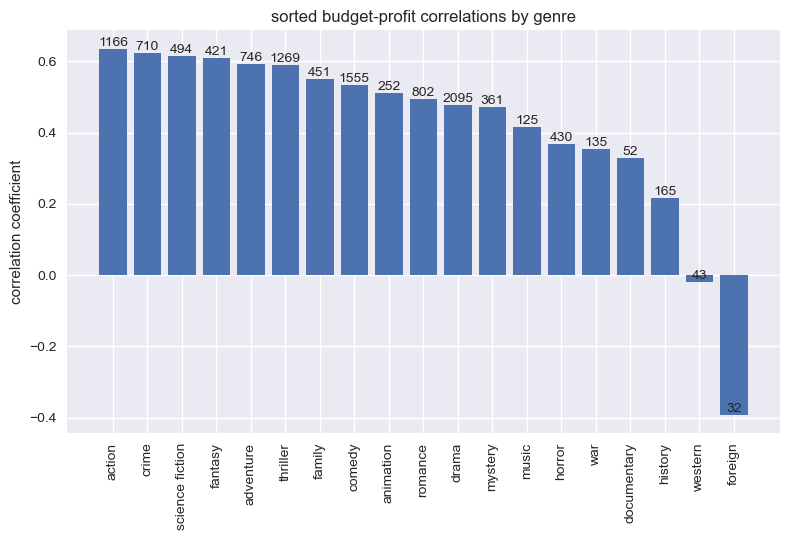

In [ ]:
genre_correlations = [np.corrcoef(tmd_90[has_value(tmd_90['genres'], genre)]['budget'], tmd_90[has_value(tmd_90['genres'], genre)]['profit'])[0][-1]
                      for genre in genre_bin.classes_]
sorted_corrs = np.argsort(genre_correlations)[::-1]

bars = plt.bar(genre_bin.classes_[sorted_corrs][1:], np.array(genre_correlations)[sorted_corrs][1:])
for rect, genre in zip(bars, genre_bin.classes_[sorted_corrs][1:]):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, rect.get_height(), 
             tmd_90[has_value(tmd_90['genres'], genre)].shape[0], ha='center', va='bottom')
    
plt.xticks(genre_bin.classes_[sorted_corrs][1:],  np.array(genres_lower)[sorted_corrs][1:], rotation=90)
plt.title('sorted budget-profit correlations by genre')
plt.ylabel('correlation coefficient')
plt.tight_layout()
plt.savefig('sorted_budget_profit_correlations')

In [ ]:
genre_correlation_over_100 = [0, 4, 15, 8, 1, 17, 7, 3, 2, 14, 6, 13, 12, 11, 18, 10]
genre_correlation_over_100

[0, 4, 15, 8, 1, 17, 7, 3, 2, 14, 6, 13, 12, 11, 18, 10]

In [ ]:
sorted_corrs

array([16,  0,  4, 15,  8,  1, 17,  7,  3,  2, 14,  6, 13, 12, 11, 18,  5,
       10, 19,  9], dtype=int64)

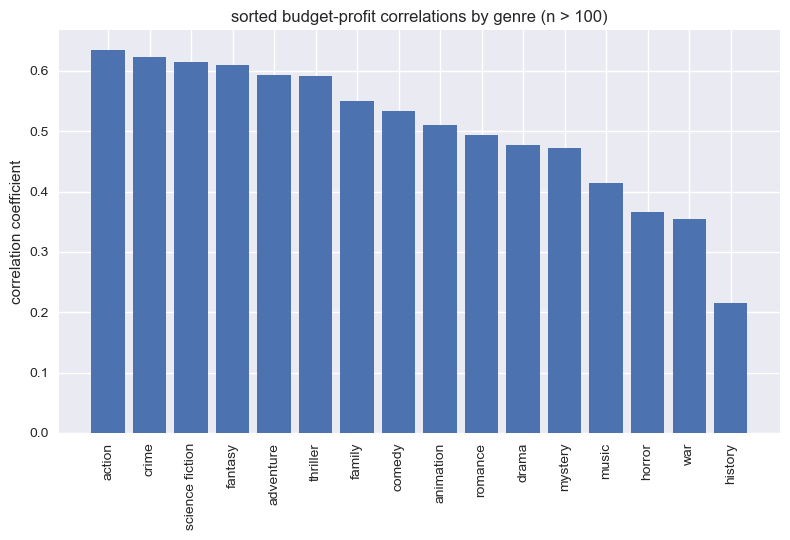

In [ ]:
plt.bar(genre_bin.classes_[genre_correlation_over_100], np.array(genre_correlations)[genre_correlation_over_100])
plt.xticks(genre_bin.classes_[genre_correlation_over_100],  np.array(genres_lower)[genre_correlation_over_100], rotation=90)
plt.title('sorted budget-profit correlations by genre (n > 100)')
plt.ylabel('correlation coefficient')
plt.tight_layout()

In [ ]:
plt.style.use('default')

In [ ]:
tmd_usa

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,title,vote_average,vote_count,year,profit
0,30000000.0,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",en,21.946943,[Pixar Animation Studios],[United States of America],373554033.0,81.0,Toy Story,7.7,5415.0,1995.0,343554033.0
1,65000000.0,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",en,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,104.0,Jumanji,6.9,2413.0,1995.0,197797249.0
2,16000000.0,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...",en,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0,65452156.0
3,60000000.0,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],187436818.0,170.0,Heat,7.7,1886.0,1995.0,127436818.0
4,35000000.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,5.23158,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],64350171.0,106.0,Sudden Death,5.5,174.0,1995.0,29350171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,8500000.0,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,1.542843,[Metro-Goldwyn-Mayer (MGM)],"[United States of America, Japan]",5730596.0,90.0,Gymkata,4.7,14.0,1985.0,-2769404.0
4378,260000000.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,39.186819,"[Paramount Pictures, Di Bonaventura Pictures, ...",[United States of America],604942143.0,149.0,Transformers: The Last Knight,6.2,1440.0,2017.0,344942143.0
4379,60000000.0,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",en,50.903593,"[Imagine Entertainment, Weed Road Pictures, Me...","[South Africa, United States of America]",71000000.0,95.0,The Dark Tower,5.7,688.0,2017.0,11000000.0
4380,50000000.0,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",en,33.694599,"[Columbia Pictures, Sony Pictures Animation]",[United States of America],66913939.0,86.0,The Emoji Movie,5.8,327.0,2017.0,16913939.0


In [ ]:
company_bin = MultiLabelBinarizer()
company_hot = company_bin.fit_transform(tmd_usa['production_companies'])
company_hot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
company_hot.shape

(4382, 4050)

In [ ]:
def drop_infrequent(sparse):
    counts = np.zeros(sparse.shape[1])
    for x in range(sparse.shape[0]):
        for i in range(sparse.shape[1]):
            if sparse[x][i] == 1:
                counts[i] += 1
    top = 100
    top_i = np.argpartition(counts, -top)[-top:]
    new_sparse = np.zeros((sparse.shape[0], top + 1))
    for x in range(sparse.shape[0]):
        found = False
        for i in range(top_i.shape[0]):
            if sparse[x][top_i[i]] == 1:
                new_sparse[i] = 1
                found = True
        if not found:
            new_sparse[top] = 1
    return new_sparse

In [ ]:
company_bin.inverse_transform(company_hot)[:5]

[('Pixar Animation Studios',),
 ('Interscope Communications', 'Teitler Film', 'TriStar Pictures'),
 ('Twentieth Century Fox Film Corporation',),
 ('Forward Pass', 'Regency Enterprises', 'Warner Bros.'),
 ('Imperial Entertainment', 'Signature Entertainment', 'Universal Pictures')]

In [ ]:
company_bin.classes_

array(['"DIA" Productions GmbH & Co. KG', '1019 Entertainment',
       '10th Hole Productions', ..., 'thefyzz', 'thinkfilm',
       'warner bross Turkey'], dtype=object)

In [ ]:
tmd_usa['production_companies'] = pd.Series(list(company_hot))
tmd_usa.head()

,budget,genres,original_language,popularity,production_companies,production_countries,revenue,runtime,title,vote_average,vote_count,year,profit
0,30000000.0,"[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",en,21.946943,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[United States of America],373554033.0,81.0,Toy Story,7.7,5415.0,1995.0,343554033.0
1,65000000.0,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...",en,17.015539,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[United States of America],262797249.0,104.0,Jumanji,6.9,2413.0,1995.0,197797249.0
2,16000000.0,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ...",en,3.859495,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[United States of America],81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995.0,65452156.0
3,60000000.0,"[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,17.924927,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[United States of America],187436818.0,170.0,Heat,7.7,1886.0,1995.0,127436818.0
4,35000000.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",en,5.23158,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[United States of America],64350171.0,106.0,Sudden Death,5.5,174.0,1995.0,29350171.0


In [ ]:
tmd_usa = tmd_usa[tmd_usa['year'] >= 1990]

In [213]:
X = tmd_usa[['genres','budget', 'runtime', 'year', 'vote_average', 'vote_count']].values
y = tmd_usa['revenue'].values
X, y

(array([[array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
         30000000.0, 81.0, 1995.0, 7.7, 5415.0],
        [array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
         65000000.0, 104.0, 1995.0, 6.9, 2413.0],
        [array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
         16000000.0, 127.0, 1995.0, 6.1, 34.0],
        ...,
        [array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]),
         60000000.0, 95.0, 2017.0, 5.7, 688.0],
        [array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
         50000000.0, 86.0, 2017.0, 5.8, 327.0],
        [array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]),
         11000000.0, 111.0, 2017.0, 7.4, 181.0]], dtype=object),
 array([3.73554033e+08, 2.62797249e+08, 8.14521560e+07, ...,
        7.10000000e+07, 6.69139390e+07, 1.84770205e+08]))

In [214]:
def plot_residuals(true, pred, title):
    y_train, y_test = true
    y_train_pred, y_test_pred = pred
    x_max = np.max(
        [np.max(y_train_pred), np.max(y_test_pred)])
    x_min = np.min(
        [np.min(y_train_pred), np.min(y_test_pred)])
    fig, (ax1, ax2) = plt.subplots(
        2, 1, figsize=(5, 8), sharey=True)
    ax1.scatter(
        y_train_pred, y_train_pred - y_train,
        c='steelblue', marker='o', edgecolor='white',
        label='Training data')
    ax2.scatter(
        y_test_pred, y_test_pred - y_test,
        c='green', marker='s',
        edgecolor='white',
        label='Test data')
    ax1.set_ylabel('Residuals')

    for ax in (ax1, ax2):
        ax.set_xlabel('Predicted values')
        ax.legend(loc='upper left')
        ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,\
            color='black', lw=2)
        ax.grid()
        ax.ticklabel_format(axis='both', style='plain')
        ax.set_xticklabels(ax.get_xticks(), rotation=40)
    fig.suptitle(title)

In [215]:
def concat_list_items(array):
    new_arr = []
    for x in array:
        line_arr = []
        for y in x:
            try:
                for z in y:
                    line_arr.append(z)
            except:
                line_arr.append(y)
        new_arr.append(line_arr)
    return new_arr
X = concat_list_items(X)

In [216]:
X[:2]

[[0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  30000000.0,
  81.0,
  1995.0,
  7.7,
  5415.0],
 [0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  65000000.0,
  104.0,
  1995.0,
  6.9,
  2413.0]]

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [218]:
len(X_train), len(X_test)

(2428, 1041)

In [219]:
revenue_linreg = LinearRegression()
revenue_linreg.fit(X_train, y_train)
y_train_pred, y_test_pred = revenue_linreg.predict(X_train), \
                            revenue_linreg.predict(X_test)

In [220]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(revenue_linreg, X, y, scoring='r2', cv=10)
print('Unscaled linear regression model ([genres, budget, runtime, vote_average, vote_count, year] --> [revenue])\n'
      f'training/testing MAE: {mean_absolute_error(y_train, y_train_pred):.3f}/{mean_absolute_error(y_test, y_test_pred):.3f}\n'
      f'training/testing R^2: {r2_score(y_train, y_train_pred):.3f}/{r2_score(y_test, y_test_pred):.3f}\n'
      f'10 fold cross validation R^2 mean/std: {scores.mean():.3f}/{scores.std():.3f}')

Unscaled linear regression model ([genres, budget, runtime, vote_average, vote_count, year] --> [revenue])
training/testing MAE: 54825373.158/60492385.993
training/testing R^2: 0.740/0.733
10 fold cross validation R^2 mean/std: 0.709/0.093


In [221]:
X = np.array(X)
X_nothot = X[:, 20:]
X_hot = X[:, :20]

In [222]:
X_nothot.shape

(3469, 5)

In [223]:
X == np.hstack((X_hot, X_nothot))

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [224]:
X.shape, np.hstack((X_hot, X_nothot)).shape

((3469, 25), (3469, 25))

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)
revenue_linreg = LinearRegression()
revenue_linreg.fit(X_train_std, y_train)
y_train_pred, y_test_pred = revenue_linreg.predict(X_train_std), \
                            revenue_linreg.predict(X_test_std)
scores = cross_val_score(revenue_linreg, X_scaled, y, scoring='r2', cv=10)
print('Fully scaled linear regression model (scaled[genres, budget, runtime, vote_average, vote_count, year] --> [revenue])\n'
      f'training/testing MAE: {mean_absolute_error(y_train, y_train_pred):.3f}/{mean_absolute_error(y_test, y_test_pred):.3f}\n'
      f'training/testing R^2: {r2_score(y_train, y_train_pred):.3f}/{r2_score(y_test, y_test_pred):.3f}\n'
      f'10 fold cross validation R^2 mean/std: {scores.mean():.3f}/{scores.std():.3f}')

Fully scaled linear regression model (scaled[genres, budget, runtime, vote_average, vote_count, year] --> [revenue])
training/testing MAE: 55446137.137/59865927.250
training/testing R^2: 0.745/0.724
10 fold cross validation R^2 mean/std: 0.651/0.172


In [226]:
X_scaled = scaler.fit_transform(X_nothot)
X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)
revenue_linreg = LinearRegression()
revenue_linreg.fit(X_train_std, y_train)
y_train_pred, y_test_pred = revenue_linreg.predict(X_train_std), \
                            revenue_linreg.predict(X_test_std)
scores = cross_val_score(revenue_linreg, X_scaled, y, scoring='r2', cv=10)
print('Scaled linear regression model, excluding genre (scaled[budget, runtime, vote_average, vote_count, year] --> [revenue])\n'
      f'training/testing MAE: {mean_absolute_error(y_train, y_train_pred):.3f}/{mean_absolute_error(y_test, y_test_pred):.3f}\n'
      f'training/testing R^2: {r2_score(y_train, y_train_pred):.3f}/{r2_score(y_test, y_test_pred):.3f}\n'
      f'10 fold cross validation R^2 mean/std: {scores.mean():.3f}/{scores.std():.3f}')

Scaled linear regression model, excluding genre (scaled[budget, runtime, vote_average, vote_count, year] --> [revenue])
training/testing MAE: 56871365.650/57063640.504
training/testing R^2: 0.708/0.746
10 fold cross validation R^2 mean/std: 0.698/0.086


In [227]:
X_scaled = np.hstack((X_hot, scaler.fit_transform(X_nothot)))
X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)
revenue_linreg = LinearRegression()
revenue_linreg.fit(X_train_std, y_train)
y_train_pred, y_test_pred = revenue_linreg.predict(X_train_std), \
                            revenue_linreg.predict(X_test_std)
scores = cross_val_score(revenue_linreg, X_scaled, y, scoring='r2', cv=10)
print('Partially scaled linear regression model ([genres] + scaled[budget, runtime, vote_average, vote_count, year] --> [revenue])\n'
      f'training/testing MAE: {mean_absolute_error(y_train, y_train_pred):.3f}/{mean_absolute_error(y_test, y_test_pred):.3f}\n'
      f'training/testing R^2: {r2_score(y_train, y_train_pred):.3f}/{r2_score(y_test, y_test_pred):.3f}\n'
      f'10 fold cross validation R^2 mean/std: {scores.mean():.3f}/{scores.std():.3f}')

Partially scaled linear regression model ([genres] + scaled[budget, runtime, vote_average, vote_count, year] --> [revenue])
training/testing MAE: 57127581.625/56594074.604
training/testing R^2: 0.736/0.743
10 fold cross validation R^2 mean/std: 0.709/0.093


C:\Users\micha\AppData\Local\Temp\ipykernel_16288\3760004858.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=40)


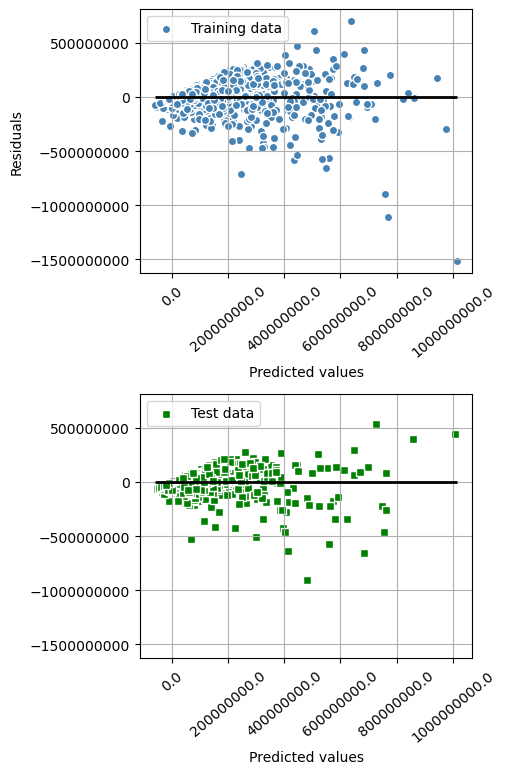

In [228]:
plot_residuals((y_train, y_test), (y_train_pred, y_test_pred), '')
plt.tight_layout()
plt.show()

In [229]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)
X_scaled = np.hstack((X_hot, quad.fit_transform(scaler.fit_transform(X_nothot))))
X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)
revenue_poly = LinearRegression()
revenue_poly.fit(X_train_std, y_train)
y_train_pred, y_test_pred = revenue_poly.predict(X_train_std), \
                            revenue_poly.predict(X_test_std)
scores = cross_val_score(revenue_poly, X_scaled, y, scoring='r2', cv=10)
print('Partially scaled quadratic regression model ([genres] + scaled[budget, runtime, vote_average, vote_count, year] --> [revenue])\n'
      f'training/testing MAE: {mean_absolute_error(y_train, y_train_pred):.3f}/{mean_absolute_error(y_test, y_test_pred):.3f}\n'
      f'training/testing R^2: {r2_score(y_train, y_train_pred):.3f}/{r2_score(y_test, y_test_pred):.3f}\n'
      f'10 fold cross validation R^2 mean/std: {scores.mean():.3f}/{scores.std():.3f}')

Partially scaled quadratic regression model ([genres] + scaled[budget, runtime, vote_average, vote_count, year] --> [revenue])
training/testing MAE: 49301312.993/56491884.611
training/testing R^2: 0.787/0.779
10 fold cross validation R^2 mean/std: 0.761/0.052


C:\Users\micha\AppData\Local\Temp\ipykernel_16288\3760004858.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=40)


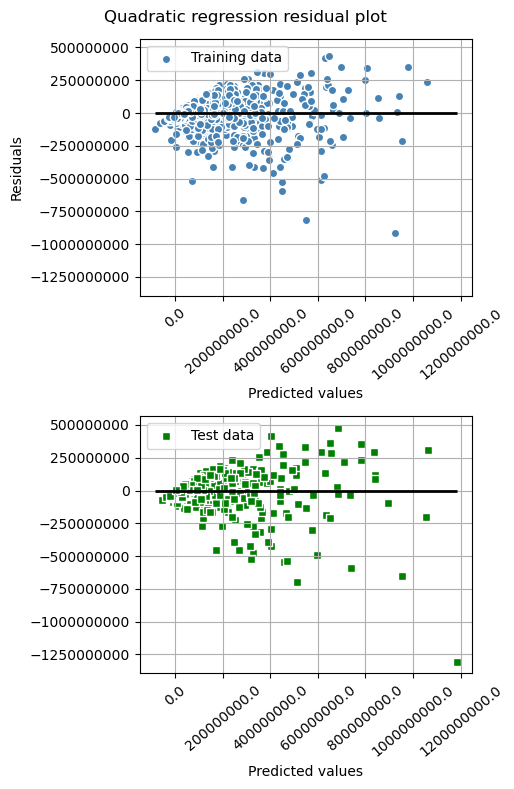

In [230]:
plot_residuals((y_train, y_test), (y_train_pred, y_test_pred), 'Quadratic regression residual plot')
plt.tight_layout()
plt.savefig('quadratic_residuals')
plt.show()

In [231]:
tri = PolynomialFeatures(degree=3)
X_scaled = np.hstack((X_hot, tri.fit_transform(scaler.fit_transform(X_nothot))))
X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)
revenue_poly = LinearRegression()
revenue_poly.fit(X_train_std, y_train)
y_train_pred, y_test_pred = revenue_poly.predict(X_train_std), \
                            revenue_poly.predict(X_test_std)
scores = cross_val_score(revenue_poly, X_scaled, y, scoring='r2', cv=10)
print('Partially scaled triatic regression model ([genres] + scaled[budget, runtime, vote_average, vote_count, year] --> [revenue])\n'
      f'training/testing MAE: {mean_absolute_error(y_train, y_train_pred):.3f}/{mean_absolute_error(y_test, y_test_pred):.3f}\n'
      f'training/testing R^2: {r2_score(y_train, y_train_pred):.3f}/{r2_score(y_test, y_test_pred):.3f}\n'
      f'10 fold cross validation R^2 mean/std: {scores.mean():.3f}/{scores.std():.3f}')

Partially scaled triatic regression model ([genres] + scaled[budget, runtime, vote_average, vote_count, year] --> [revenue])
training/testing MAE: 47745324.820/52375289.124
training/testing R^2: 0.823/0.742
10 fold cross validation R^2 mean/std: 0.767/0.064


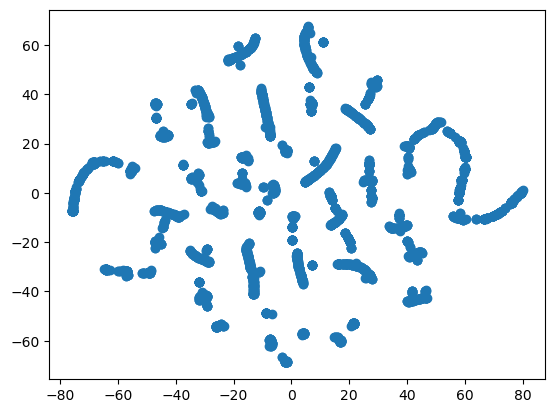

In [232]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca')
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [233]:
genre_bin.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

In [234]:
tsne = TSNE(n_components=2, init='pca', n_jobs=-1)
X_tsne_p = np.array(concat_list_items(tmd_usa[['budget', 'runtime', 'year', 'revenue', 'genres', 'vote_count', 'vote_average']].values))
X_tsne = tsne.fit_transform(X_tsne_p)

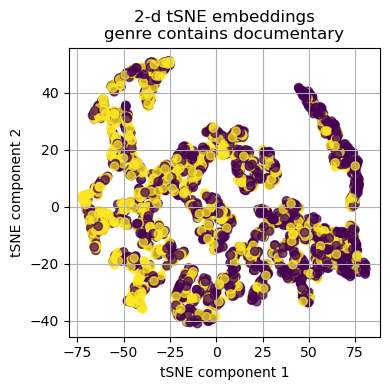

In [235]:
plt.figure(figsize=(4, 4))
doc = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_tsne_p[:, 10], alpha=0.7)
plt.grid()
plt.title('2-d tSNE embeddings\ngenre contains documentary')
plt.xlabel('tSNE component 1')
plt.ylabel('tSNE component 2')
plt.tight_layout()
plt.show()

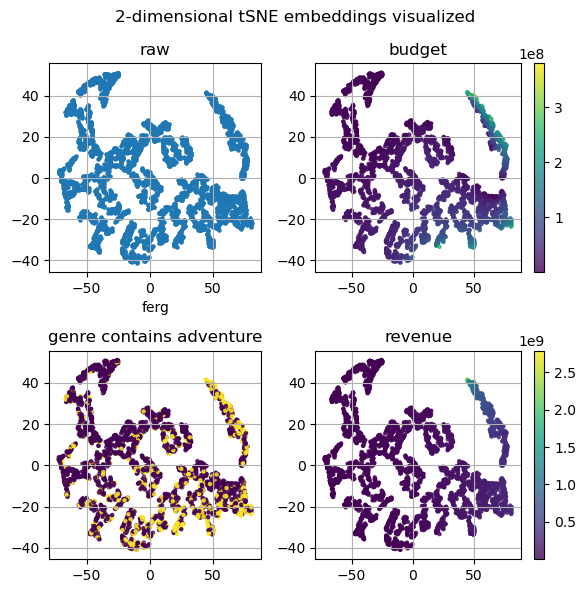

In [236]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6),
                       gridspec_kw={'width_ratios':[3.3, 4]})
s = 5
alpha = 0.8
ax[0][0].scatter(X_tsne[:, 0], X_tsne[:, 1], s=s); ax[0][0].set_title('raw'); ax[0][0].grid()
bud = ax[0][1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_tsne_p[:, 0], s=s, alpha=alpha); ax[0][1].set_title('budget'); ax[0][1].grid()
ax[1][0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_tsne_p[:, 4], s=s, alpha=alpha); ax[1][0].set_title('genre contains adventure'); ax[1][0].grid()
rev = ax[1][1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_tsne_p[:, 3], s=s, alpha=alpha); ax[1][1].set_title('revenue'); ax[1][1].grid()
fig.colorbar(bud, ax=ax[0][1]); fig.colorbar(rev, ax=ax[1][1])
fig.suptitle('2-dimensional tSNE embeddings visualized')
ax[0][0].set_xlabel('ferg')
plt.tight_layout()
plt.show()

In [237]:
from sklearn.linear_model import RANSACRegressor
lr = LinearRegression()
X_scaled = np.hstack((X_hot, quad.fit_transform(scaler.fit_transform(X_nothot))))
X_train_std, X_test_std, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3)
revenue_poly = RANSACRegressor(estimator=lr)
revenue_poly.fit(X_train_std, y_train)
y_train_pred, y_test_pred = revenue_poly.predict(X_train_std), \
                            revenue_poly.predict(X_test_std)
scores = cross_val_score(revenue_poly, X_scaled, y, scoring='r2', cv=10)
print('Partially scaled quadratic regression model ([genres] + scaled[budget, runtime, vote_average, vote_count, year] --> [revenue])\n'
      f'training/testing MAE: {mean_absolute_error(y_train, y_train_pred):.3f}/{mean_absolute_error(y_test, y_test_pred):.3f}\n'
      f'training/testing R^2: {r2_score(y_train, y_train_pred):.3f}/{r2_score(y_test, y_test_pred):.3f}\n'
      f'10 fold cross validation R^2 mean/std: {scores.mean():.3f}/{scores.std():.3f}')

Partially scaled quadratic regression model ([genres] + scaled[budget, runtime, vote_average, vote_count, year] --> [revenue])
training/testing MAE: 96301735.027/93276107.281
training/testing R^2: -0.042/-0.103
10 fold cross validation R^2 mean/std: 0.214/0.410


In [421]:
space = list(np.logspace(3, 7))
space

[1000.0,
 1206.792640639329,
 1456.3484775012444,
 1757.510624854791,
 2120.9508879201903,
 2559.547922699536,
 3088.8435964774817,
 3727.593720314938,
 4498.432668969444,
 5428.67543932386,
 6551.285568595509,
 7906.043210907702,
 9540.954763499944,
 11513.95399326448,
 13894.95494373136,
 16768.329368110066,
 20235.896477251554,
 24420.5309454865,
 29470.517025518096,
 35564.80306223129,
 42919.34260128778,
 51794.74679231213,
 62505.51925273976,
 75431.20063354608,
 91029.81779915227,
 109854.11419875572,
 132571.1365590108,
 159985.87196060573,
 193069.77288832495,
 232995.1810515372,
 281176.8697974225,
 339322.17718953296,
 409491.5062380419,
 494171.33613238385,
 596362.3316594637,
 719685.6730011514,
 868511.3737513521,
 1048113.1341546853,
 1264855.2168552957,
 1526417.9671752302,
 1842069.9693267164,
 2222996.482526191,
 2682695.7952797273,
 3237457.54281764,
 3906939.9370546127,
 4714866.36345739,
 5689866.029018293,
 6866488.450042998,
 8286427.728546842,
 10000000.0]

In [422]:
from sklearn.linear_model import Ridge, Lasso
X_scaled = np.hstack((X_hot, quad.fit_transform(scaler.fit_transform(X_nothot))))
scores = []
for x in space:
    ridge = Lasso(alpha=x)
    score = cross_val_score(ridge, X_scaled, y, 
                            scoring='r2', cv=5, n_jobs=-1)
    scores.append([score.mean(), score.std()])

In [423]:
scores = np.array(scores)
scores[:, 0]

array([0.74797959, 0.74798066, 0.74798195, 0.74798347, 0.74798525,
       0.74798744, 0.74799002, 0.74799301, 0.74799671, 0.74800152,
       0.74800724, 0.74801433, 0.74802288, 0.748033  , 0.74804494,
       0.74805908, 0.7480756 , 0.74809474, 0.74811385, 0.74813135,
       0.7481529 , 0.74817766, 0.74821758, 0.74826155, 0.74830706,
       0.74837299, 0.74844343, 0.74851476, 0.74858999, 0.74871061,
       0.74884104, 0.74898249, 0.74908723, 0.74918311, 0.74933036,
       0.74932962, 0.74911657, 0.74860345, 0.74769769, 0.74625163,
       0.74504598, 0.74339258, 0.74111599, 0.73788876, 0.73406756,
       0.73142095, 0.72785615, 0.72281605, 0.71781569, 0.71156194])

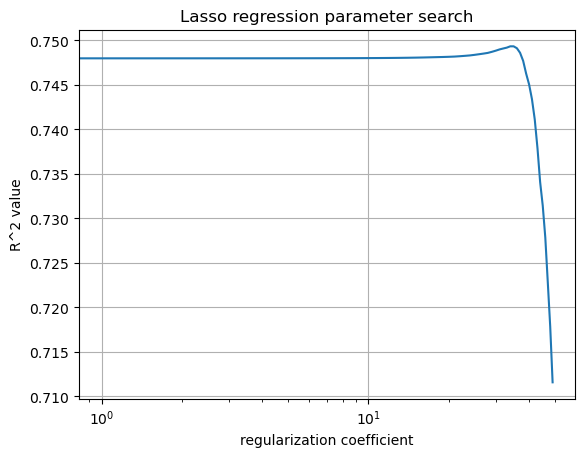

In [435]:
plt.plot(scores[:, 0])
plt.xscale('log')
plt.title('Lasso regression parameter search')
plt.ylabel('R^2 value')
plt.xlabel('regularization coefficient')
plt.grid()
plt.show()

In [436]:
tmd_usa[tmd_usa['year'] >= 2005][['year', 'title', 'vote_average']].to_csv('movietitles_after_2005.csv', index=False)